In [389]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath
from hammer import dm 
from time import time
import pandas as pd
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import plot_chain, plot_corner, style
from scipy.integrate import simps

In [390]:
style('seaborn-talk')

In [469]:
z_start = 0
z_end = 1001
dz = 1.

z = np.arange(z_start, z_end, dz)

In [470]:
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
err_per = 0.1/100
print(err_per)
log_nu0 = [np.log(1/err_per**2)]
R = [3.4E-3]
zsun = [-5.]
w0 = [-6.5]
# sigma1 = 5.
# sigma2 = 10.
# log_sigmaw = [np.log(sigma1)]
# q_sigmaw = [sigma1/sigma2]
log_sigmaw = [1.72]
q_sigmaw = [0.81]
a1 = 0.9
a2 = 0.1
# log_a = [np.log(a1)]
# q_a = [a2/a1]
log_a = [-0.42]
q_a = [0.2]

0.001


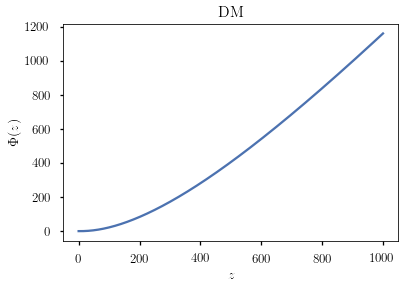

In [471]:
rhoDM = [0.0092]
theta = np.array([rhob + sigmaz + rhoDM+ log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()
phi_dm = dm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi_dm)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.title('DM')
plt.show()

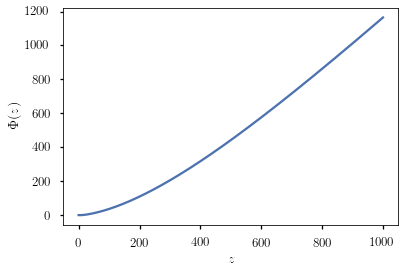

In [472]:
from hammer import dddm

# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
sigmaDD = [7]
log_hDD = [np.log(500)]
rhoDM_dd = [rhoDM[0]-sigmaDD[0]/(4*np.exp(log_hDD[0]))]

theta = np.array([rhob + sigmaz + rhoDM_dd + sigmaDD + log_hDD + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()

phi_dddm = dddm.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi_dddm)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

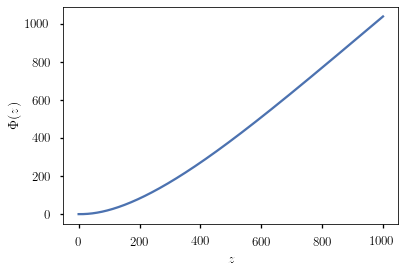

In [473]:
from hammer import no

rhob_no = list(np.array(rhob)*(rhoDM[0]/np.sum(rhob)+1))
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
theta = np.array([rhob_no + sigmaz + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()

phi_no = no.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi_no)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

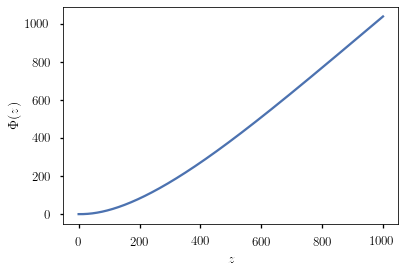

[0.9062181447502549]

In [474]:
from hammer import mond

mu0 = [1/(rhoDM[0]/np.sum(rhob)+1)]
# Baryonic density, check table 1 from this https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.121.081101
theta = np.array([rhob + sigmaz + mu0 + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()

phi_mond = mond.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi_mond)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()
mu0

# compare

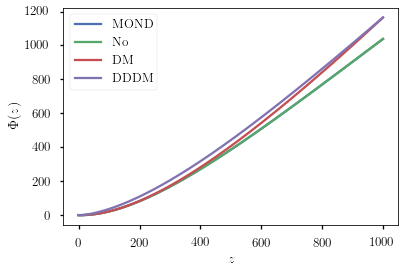

In [475]:
plt.figure(figsize=(6, 4))
plt.plot(z, phi_mond, label='MOND')
plt.plot(z, phi_no, label='No')
plt.plot(z, phi_dm, label='DM')
plt.plot(z, phi_dddm, label='DDDM')
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.legend()
plt.show()

In [476]:
def sech(x):
    return 1/np.cosh(x)

def rhoDD(z, sigmaDD, hDD):
    return sigmaDD/(4*hDD)*sech(z/(2*hDD))**2

def frho(rho0, phi, sigmaz ):
    return rho0*np.exp(-phi/sigmaz**2)

def rho_tot(z, phi, rhos, sigmaz, rhoDM, sigmaDD, hDD, R=3.4E-3):
    rho = np.array(list(map(lambda par: frho(par[0], phi, par[1]), zip(rhos, sigmaz))))
    return rho.sum(axis=0) + rhoDM + rhoDD(z, sigmaDD, hDD) - R

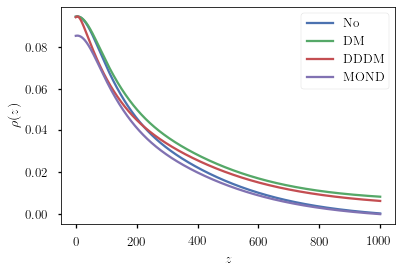

In [477]:
rho_no = rho_tot(z, phi_no, rhob_no, sigmaz, 0, 0, 1)
rho_dm = rho_tot(z, phi_dm, rhob, sigmaz, rhoDM[0], 0, 1)
rho_dddm = rho_tot(z, phi_dddm, rhob, sigmaz, rhoDM_dd, sigmaDD[0], np.exp(log_hDD[0]))
rho_mond = rho_tot(z, phi_mond, rhob, sigmaz, 0, 0, 1)

plt.figure(figsize=(6, 4))
plt.plot(z, rho_no, label='No')
plt.plot(z, rho_dm, label='DM')
plt.plot(z, rho_dddm, label='DDDM')
plt.plot(z, rho_mond, label='MOND')
# plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\rho(z)$')
plt.legend()

In [478]:
sigma_avg = np.sqrt(np.sum(np.array(rhob)*np.array(sigmaz)**2)/np.sum(np.array(rhob)))
sigma_avg

15.001172057696424

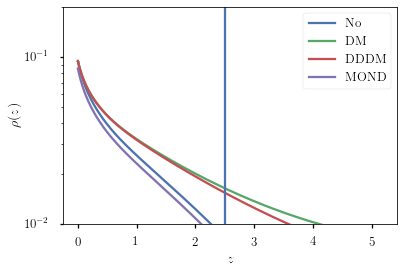

In [479]:
plt.figure(figsize=(6, 4))
plt.plot(phi_no/sigma_avg**2, rho_no, label='No')
plt.plot(phi_dm/sigma_avg**2, rho_dm, label='DM')
plt.plot(phi_dddm/sigma_avg**2, rho_dddm, label='DDDM')
plt.plot(phi_mond/sigma_avg**2, rho_mond, label='MOND')
plt.axvline(2.5)
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\rho(z)$')
plt.ylim(1E-2, 2E-1)
plt.legend()

In [480]:
from scipy.interpolate import interp1d

z_phi = interp1d(phi_dm, z)

z_phi(1*sigma_avg**2)

array(349.87105919)

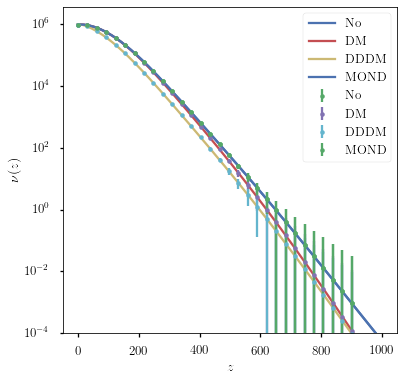

In [481]:
def nu(phi):
    sigmaw1 = np.exp(log_sigmaw[0])
    sigmaw2 = sigmaw1/q_sigmaw[0]
    a1 = np.exp(log_a[0])
    a2 = a1*q_a[0]
    nu0 = np.exp(log_nu0[0])
    atot = a1+a2
    return nu0*(a1*np.exp(-phi/sigmaw1**2) + a2*np.exp(-phi/sigmaw2**2))/atot

nu_no = nu(phi_no)
nu_dm = nu(phi_dm)
nu_dddm = nu(phi_dddm)
nu_mond = nu(phi_mond)

zzz = np.linspace(0, 900, 30)
val_no = interp1d(z, nu_no)(zzz)
val_dm = interp1d(z, nu_dm)(zzz)
val_dddm = interp1d(z, nu_dddm)(zzz)
val_mond = interp1d(z, nu_mond)(zzz)

err_no = np.sqrt(val_no)
err_dm = np.sqrt(val_dm)
err_dddm = np.sqrt(val_dddm)
err_mond = np.sqrt(val_mond)

plt.figure(figsize=(6, 6))
plt.plot(z, nu_no, label='No')
plt.errorbar(zzz, val_no, yerr=err_no, fmt='.', label='No')
plt.plot(z, nu_dm, label='DM')
plt.errorbar(zzz, val_dm, yerr=err_dm, fmt='.', label='DM')
plt.plot(z, nu_dddm, label='DDDM')
plt.errorbar(zzz, val_dddm, yerr=err_dddm, fmt='.', label='DDDM')
plt.plot(z, nu_mond, label='MOND')
plt.errorbar(zzz, val_mond, yerr=err_mond, fmt='.', label='MOND')
# plt.axvline(2.5)
plt.yscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu(z)$')
plt.ylim(1E-4)
plt.legend()
plt.show()

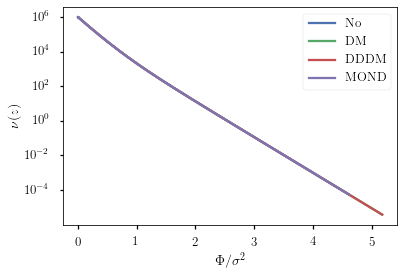

In [482]:
plt.figure(figsize=(6, 4))
plt.plot(phi_no/sigma_avg**2, nu_no, label='No')
plt.plot(phi_dm/sigma_avg**2, nu_dm, label='DM')
plt.plot(phi_dddm/sigma_avg**2, nu_dddm, label='DDDM')
plt.plot(phi_mond/sigma_avg**2, nu_mond, label='MOND')
# plt.axvline(2.5)
plt.yscale('log')
plt.xlabel(r'$\Phi/\sigma^2$')
plt.ylabel(r'$\nu(z)$')
# plt.ylim(1E-4)
plt.legend()
plt.show()

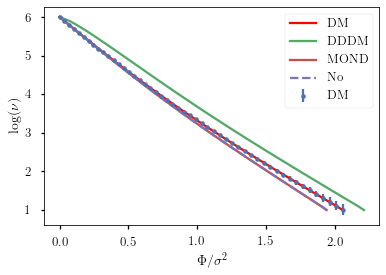

In [483]:
nu_ex = nu_dm

z_lognu = interp1d(np.log10(nu_ex), z)
log_nus = np.linspace(1, np.log10(nu_dm.max()), 50)
nus = 10**log_nus
err = np.sqrt(nus)
zz = z_lognu(log_nus)

theta = np.array([rhob + sigmaz + rhoDM+ log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()
phi_dm = dm.potential(zz, theta, dz)

theta = np.array([rhob + sigmaz + rhoDM_dd + sigmaDD + log_hDD + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()
phi_dddm = dddm.potential(zz, theta, dz)

theta = np.array([rhob + sigmaz + mu0 + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()
phi_mond = mond.potential(zz, theta, dz)

theta = np.array([rhob_no + sigmaz + log_nu0 + R + zsun + w0 + log_sigmaw + q_sigmaw + log_a + q_a]).flatten()
phi_no = no.potential(zz, theta, dz)
# plot
plt.figure(figsize=(6, 4))
plt.errorbar(phi_dm/sigma_avg**2, log_nus, yerr=(np.log10(nus+err)-log_nus, log_nus-np.log10(nus-err)), 
             fmt='.', label='DM')
plt.plot(phi_dm/sigma_avg**2, log_nus, label='DM', c='r')
plt.plot(phi_dddm/sigma_avg**2, log_nus, label='DDDM')
plt.plot(phi_mond/sigma_avg**2, log_nus, label='MOND')
plt.plot(phi_no/sigma_avg**2, log_nus, label='No', ls='--')
# plt.axvline(1)
plt.xlabel(r'$\Phi/\sigma^2$')
plt.ylabel(r'$\log(\nu)$')
plt.legend()
plt.show()


In [487]:
z_phi(1*sigma_avg**2), z_phi(2*sigma_avg**2)

(array(349.87105919), array(532.68317377))

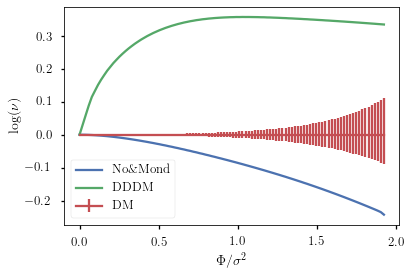

In [485]:
phis = np.linspace(0, np.max(phi_no/sigma_avg**2)*0.99, 100)
log_nus_no = interp1d(phi_no/sigma_avg**2, log_nus)(phis)
log_nus_dm = interp1d(phi_dm/sigma_avg**2, log_nus)(phis)
nus_dm = 10**log_nus_dm
err_dm = np.sqrt(nus_dm)
err_up = np.log10(nus_dm+err_dm)-log_nus_dm
err_down = log_nus_dm-np.log10(nus_dm-err_dm)

log_nus_dddm = interp1d(phi_dddm/sigma_avg**2, log_nus)(phis)
log_nus_mond = interp1d(phi_mond/sigma_avg**2, log_nus)(phis)

diff_no = log_nus_no - log_nus_dm
diff_dddm = log_nus_dddm - log_nus_dm
diff_mond = log_nus_mond - log_nus_dm
diff_dm = log_nus_dm - log_nus_dm

plt.figure(figsize=(6, 4))
plt.plot(phis, diff_no, label='No\&Mond')
plt.plot(phis, diff_dddm, label='DDDM')
plt.errorbar(phis, diff_dm, yerr=(err_up, err_down), label='DM')
plt.xlabel(r'$\Phi/\sigma^2$')
plt.ylabel(r'$\log(\nu)$')
plt.legend()
plt.show()

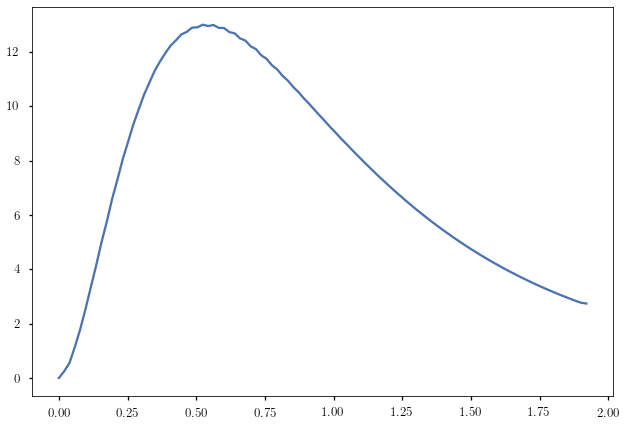

In [486]:
plt.plot(phis, (diff_dm - diff_no)/err_up)

In [368]:
z_phi(0.6*sigma_avg**2)

array(260.77507809)